In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import scipy.optimize as opt
%matplotlib inline

In [15]:
data=np.loadtxt("zams-all-mass.txt") 
data=np.transpose(data)
data.sort(axis=1)

In [16]:
M=data[1]
lgL=data[2]
lgT=data[3]
lgR=data[4]
L=10**lgL
R=10**lgR
lgM=np.log10(M)


In [17]:
print(np.shape(M))
#print(M)

(196,)


Text(0.5, 1.0, 'HR diagram & Feh=+0.25')

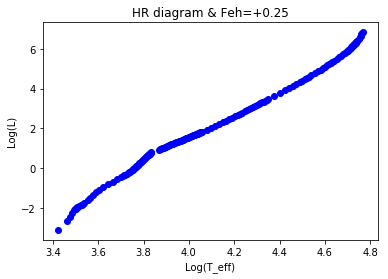

In [239]:
plt.plot(lgT,lgL,'bo')
plt.xlabel('Log(T_eff)')
plt.ylabel('Log(L)')
plt.title('HR diagram & Feh=-1.5')

# using polynomial fit of numpy package

          4          3         2
0.000835 x - 0.6433 x + 195.4 x - 779.3 x - 299.9


Text(0.5, 1.0, 'errors')

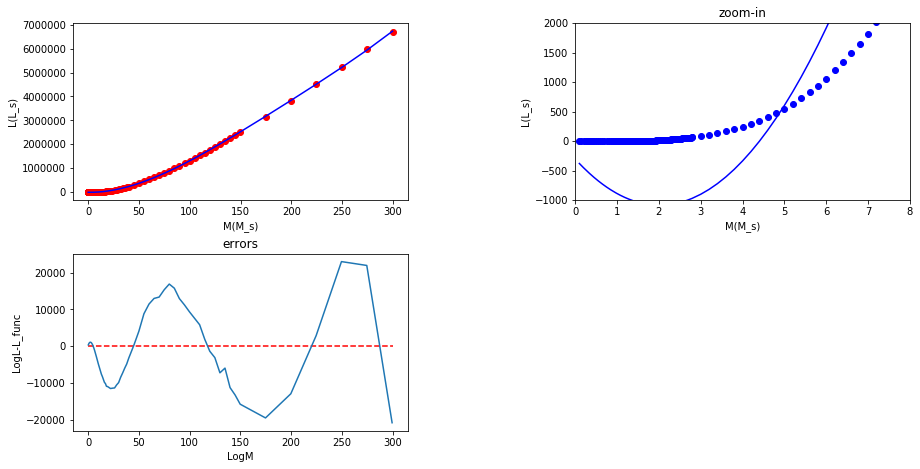

In [38]:
#######                     .......Function L......

p1=np.polyfit(M,L,4)
f1=np.poly1d(p1)
print(f1)

fig=plt.figure(figsize=(15,7.5))
fig.subplots_adjust(hspace=0.3, wspace=0.5)
fitL=f1(M)
err=L-fitL
#err=np.abs(err)
#######################
plt.subplot(221)
plt.plot(M,L,'ro')
plt.plot(M,f1(M),'b-')
#plt.title('FeH=-0.25')
plt.xlabel('M(M_s)')
plt.ylabel('L(L_s)')
#axarr[0].set_ylabel('$\lamda$')
#plt.yticks([])

plt.subplot(222)
plt.axis([0,8,-1000,2000])
plt.plot(M,L,'bo')
plt.plot(M,f1(M), 'b-')
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('L(L_s)')

plt.subplot(223)
plt.plot(M,err,'')
plt.hlines(0,xmin=0.0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('LogM')
plt.ylabel('LogL-L_func')
plt.title('errors')




         3         2
-0.2009 x + 126.1 x + 2362 x - 9744


Text(0.5, 1.0, 'errors')

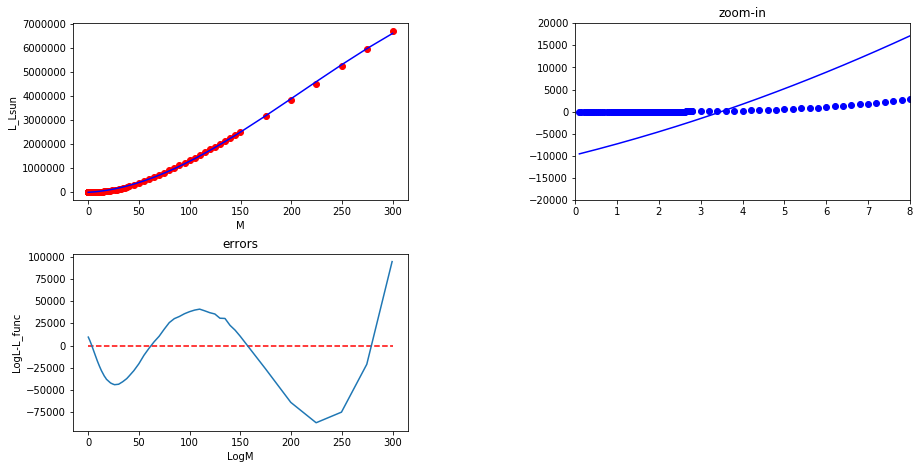

In [39]:
p1=np.polyfit(M,L,3)
f1=np.poly1d(p1)
print(f1)

fig=plt.figure(figsize=(15,7.5))
fig.subplots_adjust(hspace=0.3, wspace=0.5)
fitL=f1(M)
err=L-fitL
#err=np.abs(err)

plt.subplot(221)
plt.plot(M,L,'ro')
plt.plot(M,f1(M),'b-')
#plt.title('FeH=-0.25')
plt.xlabel('M')
plt.ylabel('L_Lsun')

plt.subplot(222)
plt.axis([0,8,-20000,20000])
plt.plot(M,L,'bo')
plt.plot(M,f1(M), 'b-')
plt.title('zoom-in')

plt.subplot(223)
plt.plot(M,err,'')
plt.hlines(0,xmin=0.0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('LogM')
plt.ylabel('LogL-L_func')
plt.title('errors')

# you can change the number in (M,L,?) to change the degree of function

# There is a log-log plot in below, I tried to fit a polynomial function to this type of data.

         5          4         3          2
-0.0231 x + 0.3021 x - 1.008 x + 0.3896 x + 4.352 x - 0.1898


Text(0.5, 1.0, 'errors')

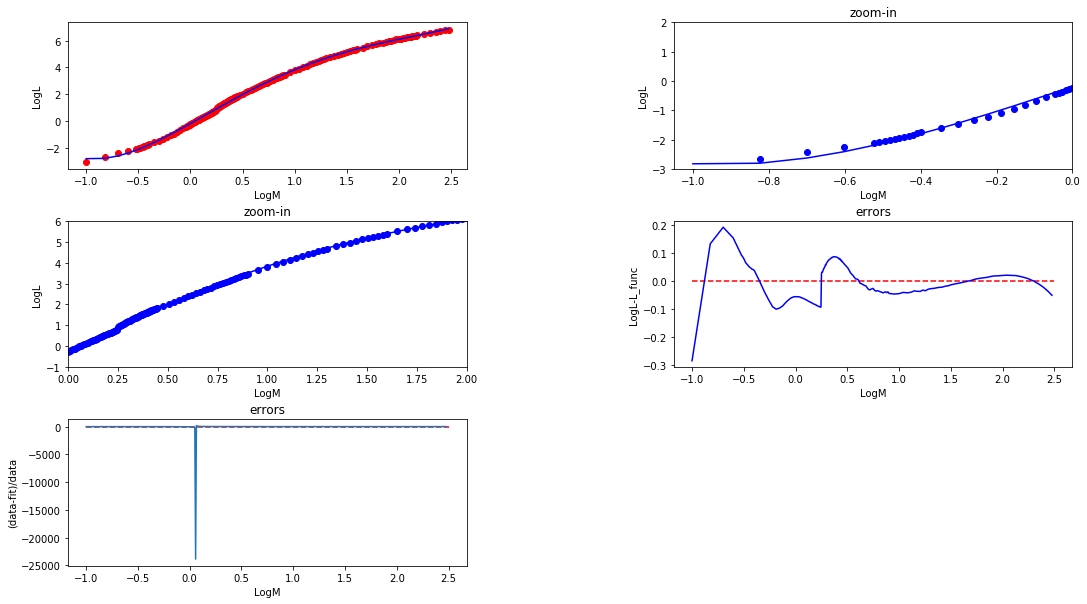

In [41]:
p1=np.polyfit(lgM,lgL,5)
f1=np.poly1d(p1)
print(f1)

fig=plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.35, wspace=0.52)
plt.subplot(321)
plt.plot(lgM,lgL,'ro')
plt.plot(lgM,f1(lgM),'b-')
#plt.title('FeH=-025')
plt.xlabel('LogM')
plt.ylabel('LogL')

plt.subplot(322)
plt.axis([-1.05,0.0,-3,2])
plt.plot(lgM,lgL,'bo')
plt.plot(lgM,f1(lgM), 'b-')
plt.title('zoom-in')
plt.xlabel('LogM')
plt.ylabel('LogL')

plt.subplot(323)
plt.axis([-0.0,2.0,-1,6])
plt.plot(lgM,lgL,'bo')
plt.plot(lgM,f1(lgM), 'b-')
plt.title('zoom-in')
plt.xlabel('LogM')
plt.ylabel('LogL')


fitL=f1(lgM)
y=0
err=lgL-fitL
#err=np.abs(err)
plt.subplot(324)
plt.plot(lgM,err,'b-')
plt.hlines(0,xmin=-1,xmax=2.5,colors='red',linestyles='dashed')
plt.xlabel('LogM')
plt.ylabel('LogL-L_func')
plt.title('errors')


plt.subplot(325)
plt.hlines(0,xmin=-1,xmax=2.5,colors='red',linestyles='dashed')
plt.plot(lgM,(np.abs(err)/lgL)*100,'')
plt.xlabel('LogM')
plt.ylabel('(data-fit)/data')
plt.title('errors')
#print(err)

# using the function in Tout et al for L


In [42]:
def funcL(M, alpha, beta, landa, delta, epsilon, zeta, nu ):
    return (alpha*M**5.5 + beta*M**11.0)/(landa + M**3.0 + delta*M**5.0 + epsilon*M**6.0 + zeta*M**8.0 +nu*M**9.5)
param_bounds=(np.zeros(7),np.ones(7)*np.inf)
optimizedParameters,pcov = opt.curve_fit(funcL, M, L,bounds=param_bounds,maxfev=1000000);
print(optimizedParameters);

[3.07159620e+07 1.49595851e-01 4.09875270e+09 1.58924949e+03
 1.05484003e-30 4.78313225e-36 1.12558452e-04]


Text(0.5, 1.0, 'errors')

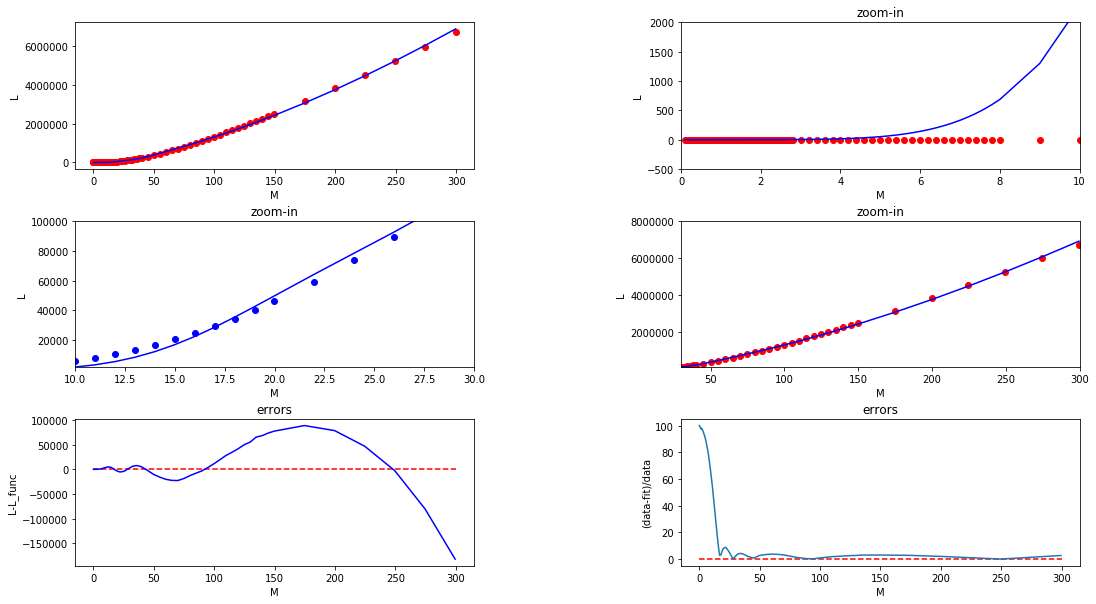

In [43]:
fig=plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.35, wspace=0.52)
plt.subplot(321)
plt.plot(M,L,'ro')
plt.plot(M,funcL(M, *optimizedParameters),'b-')
#plt.title('FeH=-4')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(322)
plt.axis([0.0,10.0,-500,2000])
plt.plot(M,lgL,'ro')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(323)
plt.axis([10,30,2000,100000])
plt.plot(M,L,'bo')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(324)
plt.axis([30,300,100000,8000000])
plt.plot(M,L,'ro')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')


fitL=funcL(M, *optimizedParameters)
y=0
err=L-fitL
#err=np.abs(err)
plt.subplot(325)
plt.plot(M,err,'b-')
plt.hlines(0,xmin=0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_func')
plt.title('errors')


plt.subplot(326)
plt.hlines(0,xmin=0,xmax=300,colors='red',linestyles='dashed')
plt.plot(M,(np.abs(err)/L)*100,'')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')
#print(err)

# changing the powers

In [224]:
def funcL(M, alpha, beta, landa, delta, epsilon, zeta, nu ):
    return (alpha*M**6.0 + beta*M**12)/(landa + M**5.5 + delta*M**5.0 + epsilon*M**7.0 + zeta*M**9.0 +nu*M**10.5)
param_bounds=(np.zeros(7),np.ones(7)*np.inf)
optimizedParameters,pcov = opt.curve_fit(funcL, M, L,bounds=param_bounds,maxfev=1000000);
print(optimizedParameters);

[6.76143151e+08 1.36433417e-01 4.44766134e+11 1.45858691e+05
 3.07199519e-07 1.02410239e-16 1.02695636e-04]


Text(0.5, 1.0, 'errors')

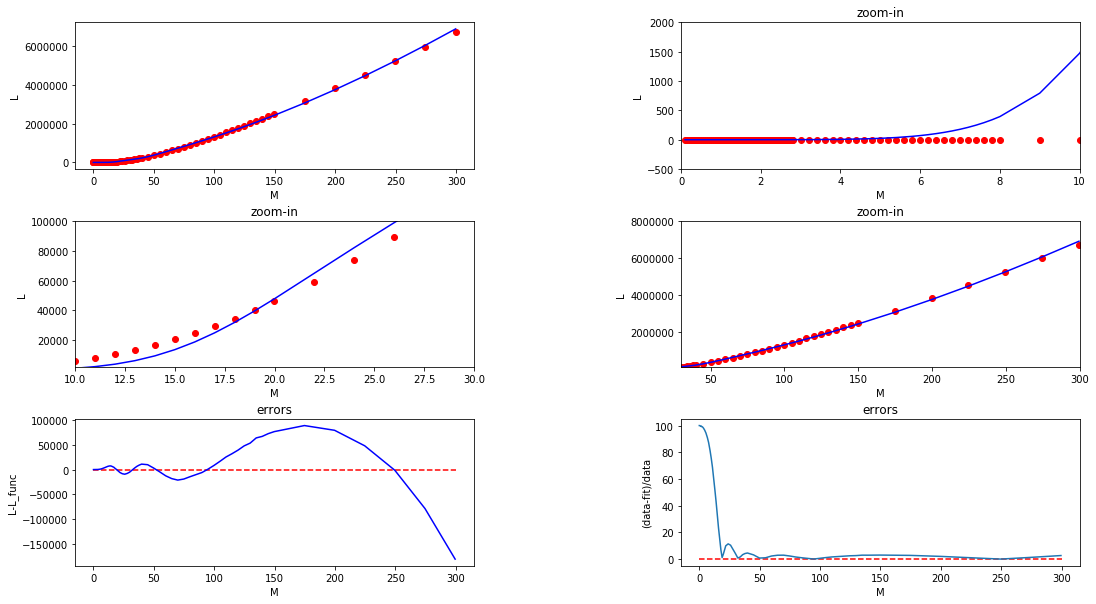

In [225]:
fig=plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.35, wspace=0.52)
plt.subplot(321)
plt.plot(M,L,'ro')
plt.plot(M,funcL(M, *optimizedParameters),'b-')
#plt.title('FeH=-4')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(322)
plt.axis([0.0,10.0,-500,2000])
plt.plot(M,lgL,'ro')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(323)
plt.axis([10,30,2000,100000])
plt.plot(M,L,'ro')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(324)
plt.axis([30,300,100000,8000000])
plt.plot(M,L,'ro')
plt.plot(M,funcL(M, *optimizedParameters), 'b-')
plt.title('zoom-in')
plt.xlabel('M')
plt.ylabel('L')


fitL=funcL(M, *optimizedParameters)
y=0
err=L-fitL
#err=np.abs(err)
plt.subplot(325)
plt.plot(M,err,'b-')
plt.hlines(0,xmin=0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_func')
plt.title('errors')


plt.subplot(326)
plt.hlines(0,xmin=0,xmax=300,colors='red',linestyles='dashed')
plt.plot(M,(np.abs(err)/L)*100,'')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')
#print(err)

# using another polynomial function

In [237]:
def func2L(M, c, e, f, q, k, l ):
     return ( e*(M/c)**4.5+ f*(M)**q + k*(M/l)**2.5 )

#param_bounds=([0,0,0,-np.inf,0,0],np.ones(6)*np.inf)
#param_bounds=(np.zeros(6),np.ones(6)*np.inf)
optimizedParameters,pcov = opt.curve_fit(func2L, M, L,maxfev=1000000);
print(optimizedParameters);

[ 1.14801727e+00  3.72677664e-05  1.42009969e+02  2.22396014e+00
 -6.65059533e-02  9.06359558e-02]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


Text(0.5, 1.0, 'errors')

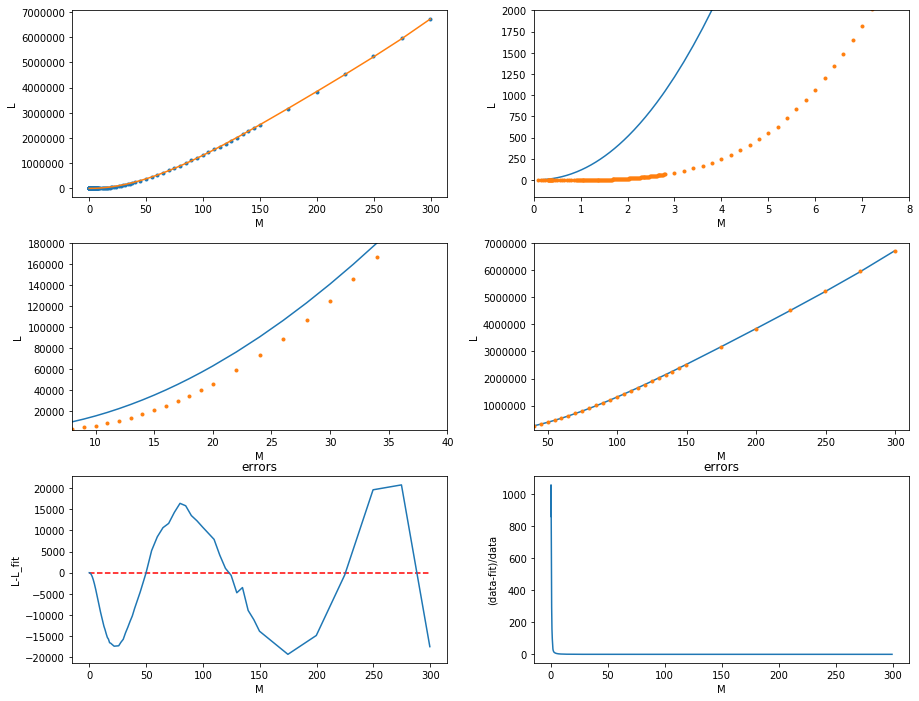

In [238]:
fig=plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace=0.25, wspace=0.23)

plt.subplot(321)
plt.plot(M, L, ".", label="Data")
plt.plot(M, func2L(M, *optimizedParameters), label="fit")
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(322)
plt.axis([0,8,-200,2000])
plt.plot(M, func2L(M,*optimizedParameters))
plt.plot(M, L, ".", label="Data")
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(323)
plt.axis([8,40,2000,180000])
plt.plot(M, func2L(M,*optimizedParameters))
plt.plot(M, L, ".", label="Data")
plt.xlabel('M')
plt.ylabel('L')

plt.subplot(324)
plt.axis([40,310,100000,7000000])
plt.plot(M, func2L(M,*optimizedParameters))
plt.plot(M, L, ".", label="Data")
plt.xlabel('M')
plt.ylabel('L')

fitL=func2L(M, *optimizedParameters)
err=L-fitL
#err=np.abs(err)
plt.subplot(325)
plt.plot(M,err,'')
plt.hlines(0,xmin=0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_fit')
plt.title('errors')
per=(np.abs(err)/L)
#print(per)
plt.subplot(326)
#plt.axis([0,1,-2,50])
plt.plot(M,per,'')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')

# Then I divided the data into 3 part, low mass, intermediate-mass and massive (they are just a name for each part without any physics behind them). Try to find the best function for each part.

LOW masses

         6          5         4         3         2
-0.5166 x + 0.5562 x + 2.132 x - 2.696 x + 1.308 x - 0.229 x + 0.014
[-0.00091076  0.00106471  0.00122429  0.00047308 -0.00047791 -0.00055036
 -0.00063992 -0.00075092 -0.0007205  -0.00066863 -0.0005594  -0.00036203
 -0.0001544   0.00017386  0.00047951  0.00124616  0.00169464  0.00165284
  0.00029958 -0.00097748 -0.00140256 -0.0018083  -0.00064245  0.00024829
  0.00128544  0.00102186  0.00114785  0.00109739  0.00030772 -0.00022379
 -0.0010911  -0.00134781 -0.00098663 -0.00124702  0.00148702  0.00061772]


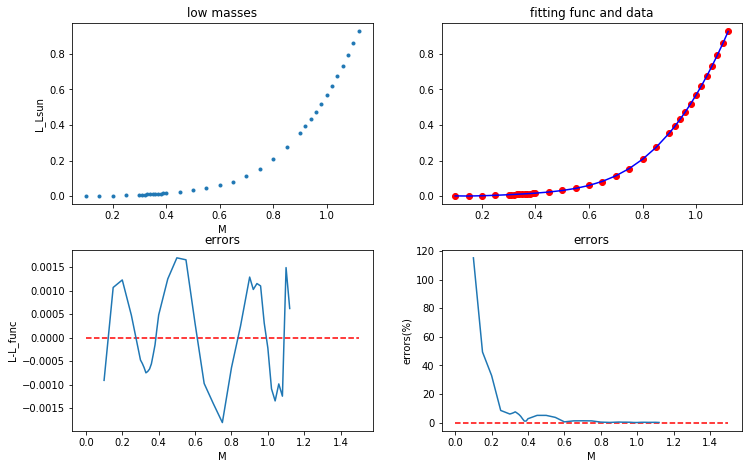

In [44]:
Mlow=M[0:36]
Llow=L[0:36]
#print (Mlow)
#print(Llow)



p1=np.polyfit(Mlow,Llow,6)
f1=np.poly1d(p1)
print(f1)
fig=plt.figure(figsize=(12,7.5))
fig.subplots_adjust(hspace=0.25, wspace=0.23)

plt.subplot(221)
plt.plot(Mlow,Llow,'.')
plt.title('low masses')
plt.xlabel('M')
plt.ylabel('L_Lsun')


plt.subplot(222)
plt.plot(Mlow,Llow,'ro')
plt.plot(Mlow,f1(Mlow),'b-')
plt.title('fitting func and data')

fitL=f1(Mlow)
err=Llow-fitL
#err=np.abs(err)
plt.subplot(223)
plt.plot(Mlow,err,'')
plt.hlines(0,xmin=0.0,xmax=1.5,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_func')
plt.title('errors')

plt.subplot(224)
plt.plot(Mlow,(np.abs(err/Llow)*100),'')
plt.hlines(0,xmin=0.0,xmax=1.5,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('errors(%)')
plt.title('errors')
print(err[0:100])

# intermediate masses

            6            5       4         3         2
-6.475e-05 x + 0.009676 x - 0.6 x + 18.67 x - 96.65 x + 232.3 x - 193.6


Text(0.5, 1.0, 'errors')

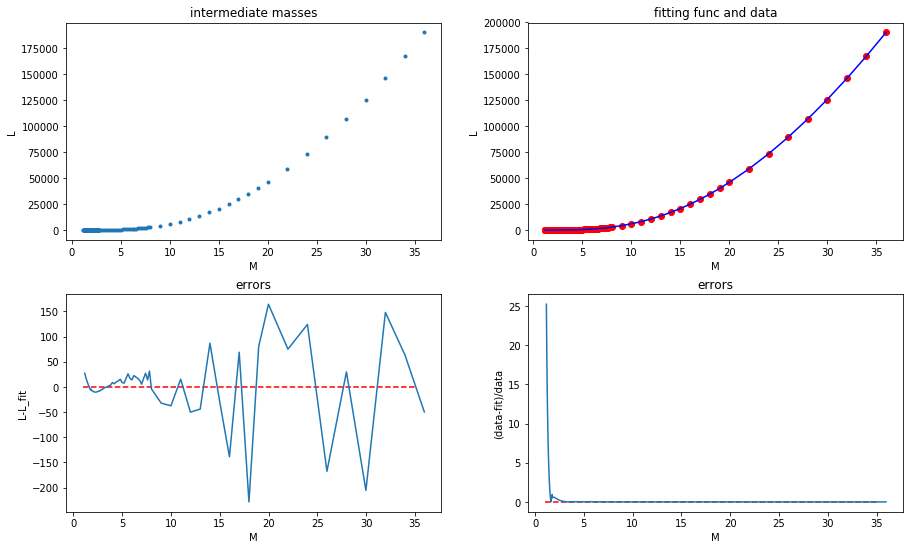

In [48]:
Mmid=M[37:166]
Lmid=L[37:166]
#print (Mmid)
#print(Lmid)

fig=plt.figure(figsize=(15,9))
fig.subplots_adjust(hspace=0.25, wspace=0.23)
plt.subplot(221)
plt.plot(Mmid,Lmid,'.')
plt.title('intermediate masses')### just a name 
plt.xlabel('M')
plt.ylabel('L')

p1=np.polyfit(Mmid,Lmid,6)
f1=np.poly1d(p1)
print(f1)
plt.subplot(222)
plt.plot(Mmid,Lmid,'ro')
plt.plot(Mmid,f1(Mmid),'b-')
plt.title('fitting func and data')
plt.xlabel('M')
plt.ylabel('L')


plt.subplot(223)
fitL=f1(Mmid)
err=Lmid-fitL
#err=np.abs(err)
plt.plot(Mmid,err,'')
plt.hlines(0,xmin=1.0,xmax=35,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_fit')
plt.title('errors')

plt.subplot(224)
#plt.axis([0,1,-2,50])
plt.plot(Mmid,(np.abs(err)/Lmid),'')
plt.hlines(0,xmin=1.0,xmax=35,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')

# high masses

       2
29.33 x + 1.546e+04 x - 4.841e+05


Text(0.5, 1.0, 'errors')

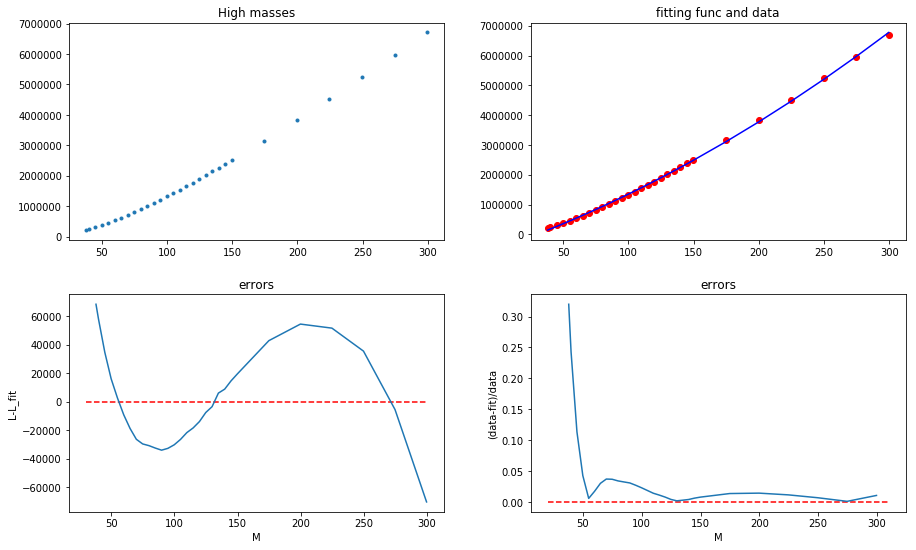

In [49]:
Mup=M[166:196]
Lup=L[166:196]
#print (Mup)
#print(Lup)
fig=plt.figure(figsize=(15,9))
fig.subplots_adjust(hspace=0.25, wspace=0.23)
plt.subplot(221)
plt.plot(Mup,Lup,'.')
plt.title('High masses')###   just a name

p1=np.polyfit(Mup,Lup,2)
f1=np.poly1d(p1)
print(f1)
plt.subplot(222)
plt.plot(Mup,Lup,'ro')
plt.plot(Mup,f1(Mup),'b-')
plt.title('fitting func and data')


fitL=f1(Mup)
err=Lup-fitL
#err=np.abs(err)
plt.subplot(223)
plt.plot(Mup,err,'')
plt.hlines(0,xmin=30,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_fit')
plt.title('errors')


plt.subplot(224)
#plt.axis([0,1,-2,50])
plt.plot(Mup,(np.abs(err)/Lup),'')
plt.hlines(0,xmin=20.0,xmax=310,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')

# using a power law function for Mup

In [85]:
def func(Mup, a, b,c,d ,e,f):
    return a * (Mup/b)**c+d*(Mup/e)**f
param_bounds=([0,0,-np.inf,0,0,-np.inf],np.ones(6)*np.inf)
optimizedParameters,pcov = opt.curve_fit(func, Mup, Lup,bounds=param_bounds, maxfev=100000);
print(optimizedParameters);
print(Mup[0],Mup[-1]) 

[1.46469848 0.01650112 1.48647636 1.46471738 0.01476564 1.48644365]
37.97060962298284 299.54255758755886


Text(0.5, 1.0, 'errors')

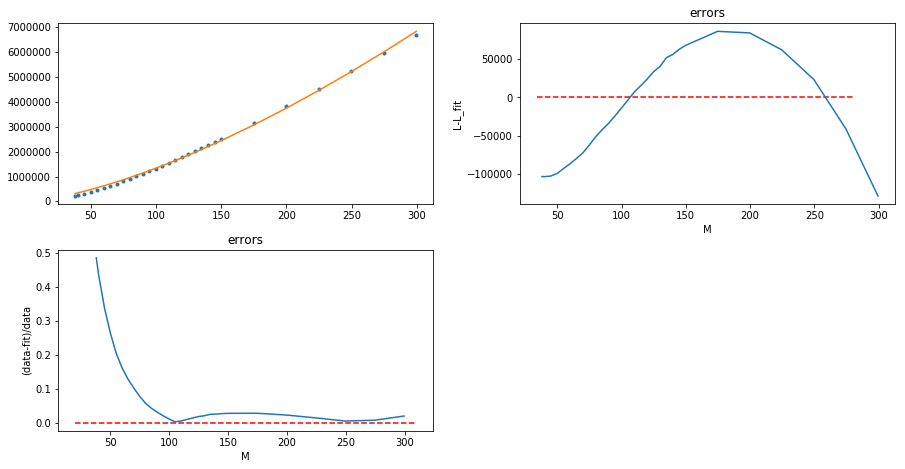

In [86]:
fitL=func(Mup, *optimizedParameters)
err=Lup-fitL

fig=plt.figure(figsize=(15,7.5))
fig.subplots_adjust(hspace=0.25, wspace=0.23)

plt.subplot(221)
plt.plot(Mup, Lup, ".", label="Data")
plt.plot(Mup, func(Mup, *optimizedParameters), label="fit")

#print(func(Mup, *optimizedParameters))

#err=np.abs(err)
plt.subplot(222)
plt.plot(Mup,err,'')
plt.hlines(0,xmin=34,xmax=280,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('L-L_fit')
plt.title('errors')

plt.subplot(223)
#plt.axis([0,1,-2,50])
plt.plot(Mup,(np.abs(err)/Lup),'')
plt.hlines(0,xmin=20.0,xmax=310,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')

# Radius as a function of Mass at ZAMS

           5             4             3            2
1.384e-10 x - 1.097e-07 x + 3.178e-05 x - 0.004208 x + 0.3257 x + 0.9429


Text(0.5, 1.0, 'errors')

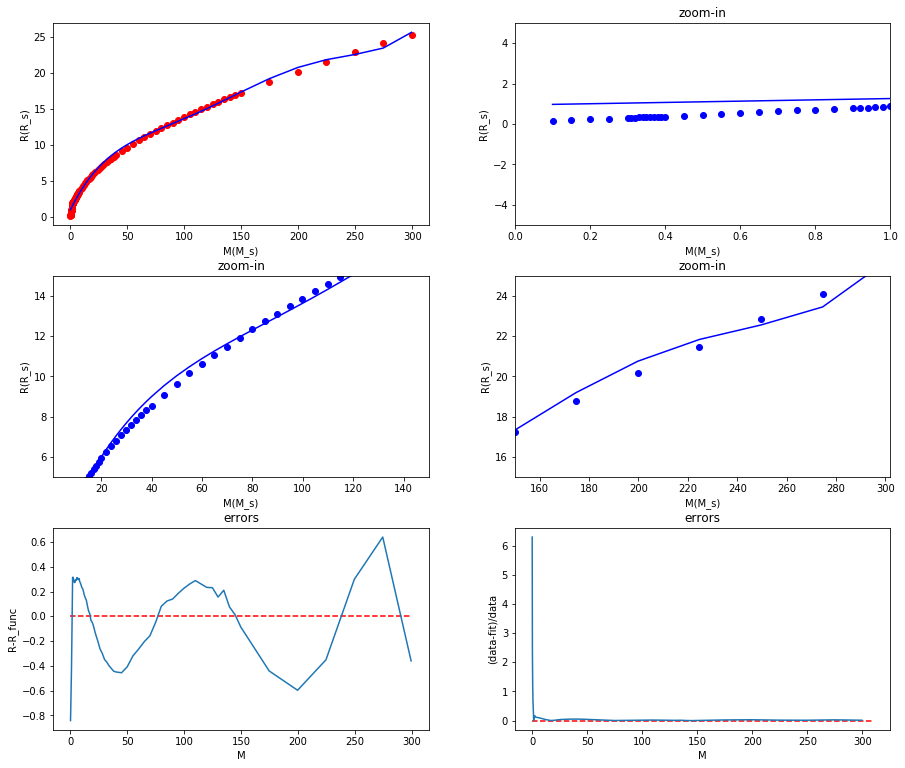

In [240]:
###### Function R

p1=np.polyfit(M,R,5)
f1=np.poly1d(p1)
print(f1)

fig=plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.25, wspace=0.23)
plt.subplot(321)
plt.plot(M,R,'ro')
plt.plot(M,f1(M),'b-')
#plt.title('FeH=-0.25')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')
#axarr[0].set_ylabel('$\lamda$')
#plt.yticks([])

plt.subplot(322)
plt.axis([0,1,-5,5])
plt.plot(M,R,'bo')
plt.plot(M,f1(M), 'b-')
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(323)
plt.axis([1,150,5,15])
plt.plot(M,R,'bo')
plt.plot(M,f1(M), 'b-')
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(324)
plt.axis([150,302,15,25])
plt.plot(M,R,'bo')
plt.plot(M,f1(M), 'b-')
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(325)
fitR=f1(M)
err=R-fitR
plt.plot(M,err,'')
plt.hlines(0,xmin=0.0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('R-R_func')
plt.title('errors')

plt.subplot(326)
#plt.axis([0,1,-2,50])
plt.plot(M,(np.abs(err)/R),'')
plt.hlines(0,xmin=0.0,xmax=310,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')


# fitting to Log-Log data

         7          6          5          4          3          2
0.04461 x - 0.2266 x + 0.2344 x + 0.3733 x - 0.5611 x - 0.2598 x + 1.014 x - 0.02256


Text(0.5, 1.0, 'errors')

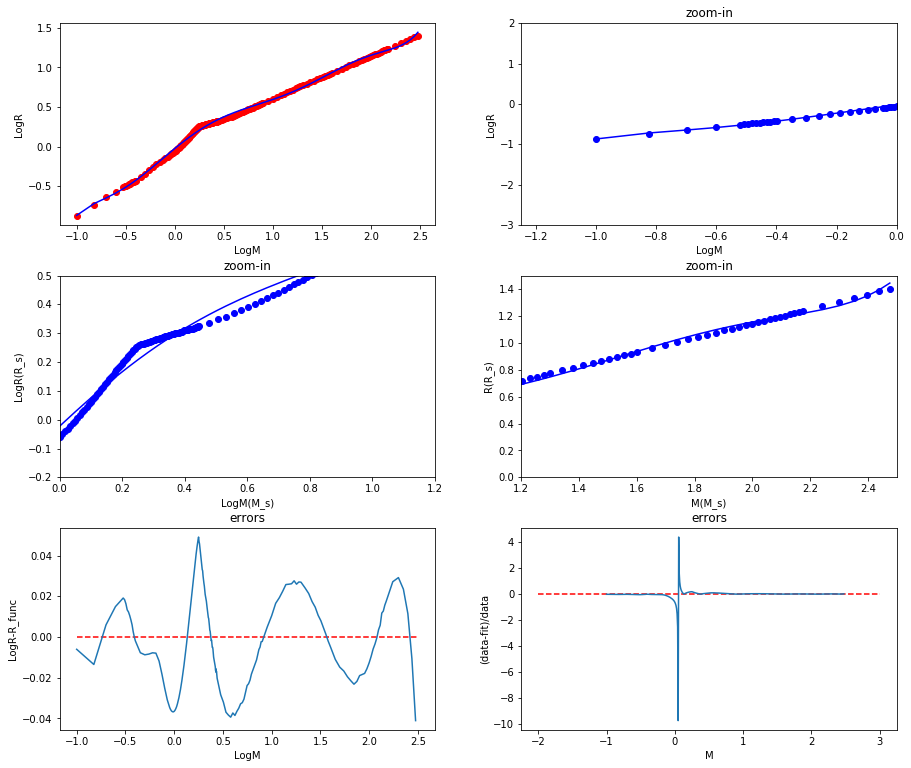

In [242]:
p1=np.polyfit(lgM,lgR,7)
f1=np.poly1d(p1)
print(f1)

fig=plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.25, wspace=0.23)
plt.subplot(321)
plt.plot(lgM,lgR,'ro')
plt.plot(lgM,f1(lgM),'b-')
#plt.title('FeH=-0.25')
plt.xlabel('LogM')
plt.ylabel('LogR')

plt.subplot(322)
plt.axis([-1.25,0.0,-3,2])
plt.plot(lgM,lgR,'bo')
plt.plot(lgM,f1(lgM), 'b-')
plt.title('zoom-in')
plt.xlabel('LogM')
plt.ylabel('LogR')

plt.subplot(323)
plt.axis([0,1.20,-0.2,0.5])
plt.plot(lgM,lgR,'bo')
plt.plot(lgM,f1(lgM), 'b-')
plt.title('zoom-in')
plt.xlabel('LogM(M_s)')
plt.ylabel('LogR(R_s)')

plt.subplot(324)
plt.axis([1.2,2.5,0,1.5])
plt.plot(lgM,lgR,'bo')
plt.plot(lgM,f1(lgM), 'b-')
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(325)
fitR=f1(lgM)
err=lgR-fitR
plt.plot(lgM,err,'')
plt.hlines(0,xmin=-1.0,xmax=2.5,colors='red',linestyles='dashed')
plt.xlabel('LogM')
plt.ylabel('LogR-R_func')
plt.title('errors')

plt.subplot(326)
#plt.axis([0,1,-2,50])
plt.plot(lgM,(np.abs(err)/lgR),'')
plt.hlines(0,xmin=-2.0,xmax=3,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')


# using the function in Tout et al  for R

In [35]:
def funcR(M, theta, iota, kappa, lambd, mu, nu, xi, omicron, pi ):
    return (theta*M**2.5 + iota*M**6.5 + kappa*M**11.0 + lambd*M**19.0 + mu*M**19.5 )/(nu + xi*M**2.0 + omicron*M**8.5 + M**18.5 + pi*M**19.5 )
param_bounds=(np.zeros(9),np.ones(9)*np.inf)
optimizedParameters,pcov = opt.curve_fit(funcR, M, R, bounds=param_bounds ,maxfev=1000000000);
print(optimizedParameters);

[1.42643720e+02 1.43828330e+02 7.35412254e+01 1.22988473e+00
 1.97905635e-02 1.95196533e+00 2.27868465e+02 1.76668742e+02
 2.71985793e-04]


Text(0.5, 1.0, 'errors')

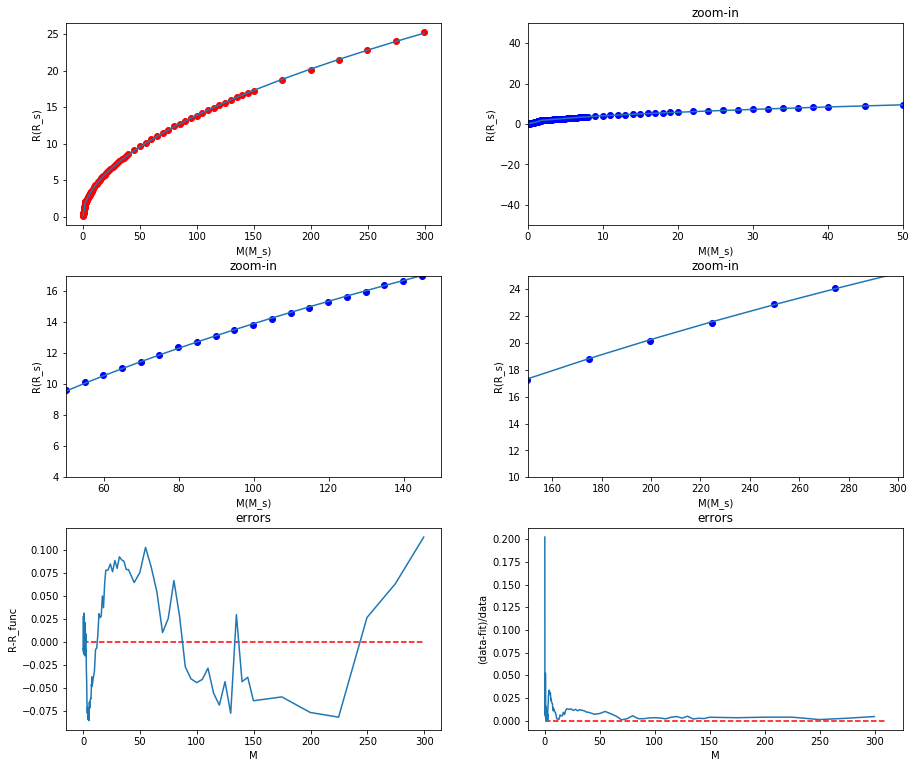

In [36]:

fig=plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.25, wspace=0.23)
plt.subplot(321)
plt.plot(M,R,'ro')
plt.plot(M, funcR(M, *optimizedParameters), label="fit")
#plt.title('FeH=-0.25')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')
#axarr[0].set_ylabel('$\lamda$')
#plt.yticks([])

plt.subplot(322)
plt.axis([0,50,-50,50])
plt.plot(M,R,'bo')
plt.plot(M, funcR(M, *optimizedParameters), label="fit")
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(323)
plt.axis([50,150,4,17])
plt.plot(M,R,'bo')
plt.plot(M, funcR(M, *optimizedParameters), label="fit")
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(324)
plt.axis([150,302,10,25])
plt.plot(M,R,'bo')
plt.plot(M, funcR(M, *optimizedParameters), label="fit")
plt.title('zoom-in')
plt.xlabel('M(M_s)')
plt.ylabel('R(R_s)')

plt.subplot(325)
fitR=funcR(M, *optimizedParameters)
err=R-fitR
plt.plot(M,err,'')
plt.hlines(0,xmin=0.0,xmax=300,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('R-R_func')
plt.title('errors')

plt.subplot(326)
#plt.axis([0,1,-2,50])
plt.plot(M,(np.abs(err)/R),'')
plt.hlines(0,xmin=0.0,xmax=310,colors='red',linestyles='dashed')
plt.xlabel('M')
plt.ylabel('(data-fit)/data')
plt.title('errors')
